## Normalization (Summary Definition)

Normalization is a data preprocessing technique used to adjust the values of features to a common scale without distorting differences in the ranges of values. It helps machine learning models perform better by ensuring that no feature dominates others due to its scale.

## 🔹 Min-Max Scaling (inside Normalization)

Min-Max Scaling is a type of normalization that transforms features to a fixed range, usually [0, 1]. It does this using the formula:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('StressLevelDataset.csv')

In [4]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
df2 = df[['anxiety_level','sleep_quality','mental_health_history']]

In [6]:
df2.head()

,anxiety_level,sleep_quality,mental_health_history
0,14,2,0
1,15,1,1
2,12,2,1
3,16,1,1
4,16,5,0


<Axes: xlabel='anxiety_level', ylabel='Density'>

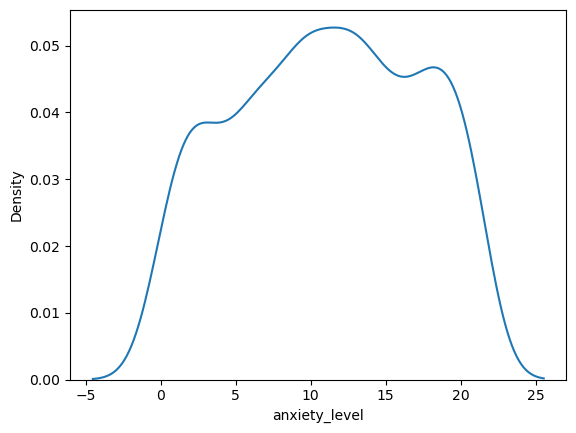

In [7]:
sns.kdeplot(df2['anxiety_level'])

<Axes: xlabel='sleep_quality', ylabel='Density'>

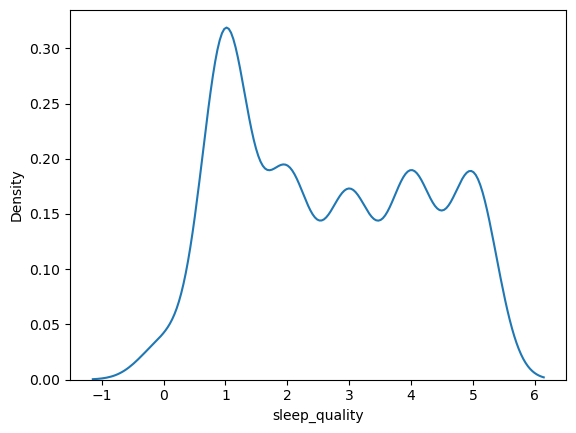

In [8]:
sns.kdeplot(df2['sleep_quality'])

In [9]:
df2.head()

,anxiety_level,sleep_quality,mental_health_history
0,14,2,0
1,15,1,1
2,12,2,1
3,16,1,1
4,16,5,0


<Axes: xlabel='anxiety_level', ylabel='sleep_quality'>

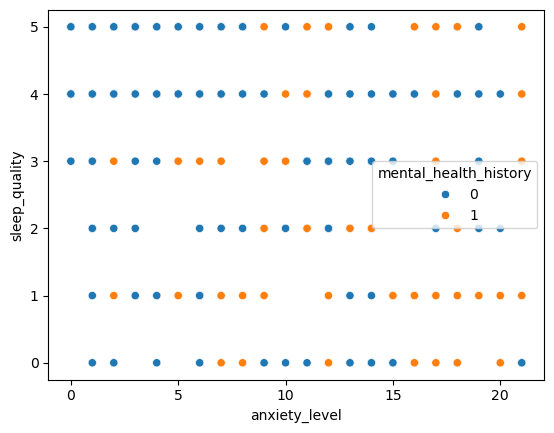

In [10]:
import seaborn as sns

sns.scatterplot(
    data=df2,
    x="anxiety_level",
    y="sleep_quality",
    hue="mental_health_history"
)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2.drop('mental_health_history',axis = 1),
                                                 df2['mental_health_history'],
                                                 test_size= 0.3,
                                                 random_state= 0
                                                 )
x_train.shape,x_test.shape

((770, 2), (330, 2))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns= x_test.columns)

In [14]:
np.round(x_train_scaled.describe())

,anxiety_level,sleep_quality
count,770.0,770.0
mean,1.0,1.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,1.0
max,1.0,1.0


In [15]:
np.round(x_train.describe(),1)

,anxiety_level,sleep_quality
count,770.0,770.0
mean,11.1,2.6
std,6.1,1.5
min,0.0,0.0
25%,6.0,1.0
50%,11.0,2.0
75%,16.0,4.0
max,21.0,5.0


In [16]:
df2.head()

,anxiety_level,sleep_quality,mental_health_history
0,14,2,0
1,15,1,1
2,12,2,1
3,16,1,1
4,16,5,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## scaling values

In [26]:
df2_copy = df2.copy()
tr = StandardScaler()
new_copy = tr.fit_transform(df2_copy)
df2_copy =  pd.DataFrame(new_copy,columns=df2_copy.columns)
df2_copy.head()

,anxiety_level,sleep_quality,mental_health_history
0,0.480208,-0.426445,-0.985559
1,0.643746,-1.072574,1.014653
2,0.153131,-0.426445,1.014653
3,0.807284,-1.072574,1.014653
4,0.807284,1.511942,-0.985559


## Minmax_scaling values

In [27]:
df2.head()

,anxiety_level,sleep_quality,mental_health_history
0,14,2,0
1,15,1,1
2,12,2,1
3,16,1,1
4,16,5,0


In [34]:
#appy the min max scaling on that data so 
minmax_scaling = MinMaxScaler()
minmax_data_copy = df2.copy()
sclaed_data = minmax_scaling.fit_transform(minmax_data_copy)

minmax_data_copy = pd.DataFrame(sclaed_data,columns=minmax_data_copy.columns)
minmax_data_copy.head()

,anxiety_level,sleep_quality,mental_health_history
0,0.666667,0.4,0.0
1,0.714286,0.2,1.0
2,0.571429,0.4,1.0
3,0.761905,0.2,1.0
4,0.761905,1.0,0.0


In [35]:
df2.head()

,anxiety_level,sleep_quality,mental_health_history
0,14,2,0
1,15,1,1
2,12,2,1
3,16,1,1
4,16,5,0


In [ ]:
# make the seperate clean df in x,y form and then put in split.
x = df2[['anxiety_level','sleep_quality']]
y = df2[['mental_health_history']]

x_trained,x_tested,y_traind,y_tested = train_test_split(x,y,random_state=42,test_size=0.2)


(880, 1)